**Dicom and nifti are the basic forms of storing the images. Generally, medical imaging in hospitals store their patients medical imaging data in dicom while for research purpose, generally the images are saved in nifti. Nifti is easy to handle as well**

In [1]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/pydicom/data/data_manager.py:375: UserWarning: A download failure occurred while attempting to retrieve US1_J2KR.dcm
  warn_and_log(
/opt/conda/lib/python3.10/site-packages/pydicom/data/data_manager.py:375: UserWarning: A download failure occurred while attempting to retrieve MR-SIEMENS-DICOM-WithOverlays.dcm
  warn_and_log(
/opt/conda/lib/python3.10/site-packages/pydicom/data/data_manager.py:375: UserWarning: A download failure occurred while attempting to retrieve OBXXXX1A.dcm
  warn_and_log(
/opt/conda/lib/python3.10/site-packages/pydicom/data/data_manager.py:375: UserWarning: A download failure occurred while attempting to retrieve US1_UNCR.dcm
  warn_and_log(
/opt/conda/lib/python3.10/site-packages/pydicom/data/data_manager.py:375: UserWarning: A download failure occurred while attempting to retrieve color3d_jpeg_baseline.dcm
  warn_and_log(


In [2]:
dicom_file = pydicom.dcmread("/kaggle/input/siim-medical-images/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm")


In [11]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0000) Group Length                        UL: 430
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088218367595492

In [12]:
dicom_file[0x0028,0x0010] ##gives the no of rows. We use 0x in 1st place because the index is hexadecimal

(0028,0010) Rows                                US: 512

In [16]:
print(f"Rows: {dicom_file.Rows}") ##when using this approach, we loose the corresponding identifier
print(f"Columns: {dicom_file.Columns}")
print(f"Body part examined: {dicom_file.BodyPartExamined}")

Rows: 512
Columns: 512
Body part examined: CHEST


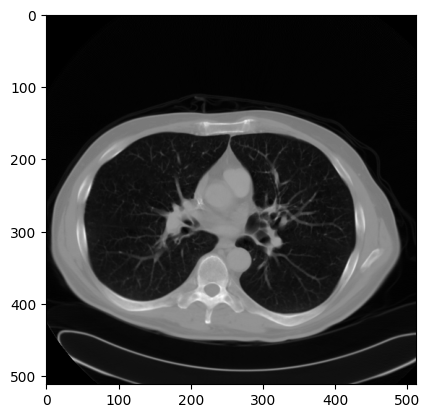

In [17]:
ct = dicom_file.pixel_array
plt.figure()
plt.imshow(ct, cmap = "gray")

In [18]:
ct.shape

(512, 512)

In [19]:
type(ct)

numpy.ndarray

In [20]:
path_to_head_mri = Path("/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001")

In [36]:
all_files = list(path_to_head_mri.glob("*")) #glob returns generator, we convert it into a list

In [37]:
len(all_files)

27

In [22]:
all_files

[PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000023'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000006'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000007'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000016'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000013'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000012'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000011'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000004'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000026'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000020'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000003'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000002'),
 PosixPath('/kaggle/input/mri-head-digicom-dataset-z

In [23]:
for path in all_files:
    print(path)
    break
    

/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000023


In [24]:
mri_data = []

for path in all_files:
    data = pydicom.dcmread(path)
    mri_data.append(data)

In [25]:
len(mri_data)

27

In [39]:
mri_data[0]

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 214
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413272270729
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.840.114089.1.0.0.3.3.38
(0002,0013) Implementation Version Name         SH: 'DCF 3.3.38c'
(0002,0016) Source Application Entity Title     AE: 'DCF'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008,0012) Instance Creation Date              DA: '20150114'
(0008,0013) Instance Creation Time              TM: '132938'
(0008,0014) Instance Creator U

In [26]:
for slice in mri_data[:5]:
    print(slice.SliceLocation)

137.999998321624
35.9999959546749
41.9999963629367
95.9999960937442
77.9999962275740


Here we could see the slice location is not in orderly manner. So converting into the ascending order

In [27]:
#Converting the data into ordered slices
sorted_mri_data = sorted(mri_data, key = lambda slice: slice.SliceLocation)
for slice in sorted_mri_data[:5]:
    print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [41]:
## extract the actual data (pixel arrays) from the DIcom files and store it in a list
sorted_full_data = []
for slice in sorted_mri_data:
    sorted_full_data.append(slice.pixel_array)

len(sorted_full_data)

27

In [44]:
import numpy as np
print(np.array(sorted_full_data).shape)

(27, 256, 256)


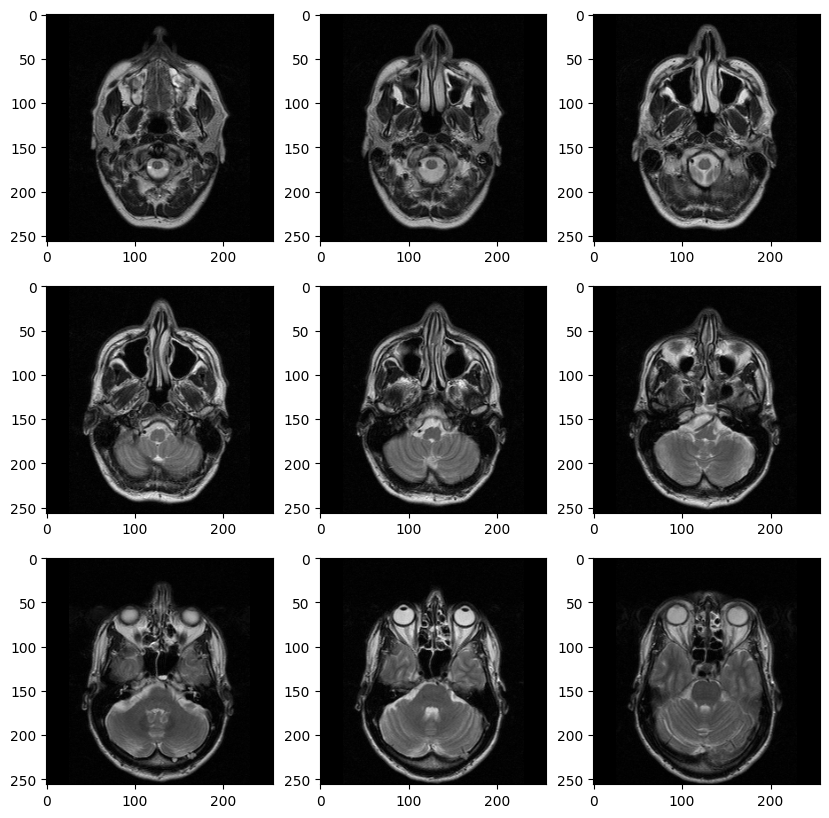

In [29]:
fig, ax = plt.subplots(3,3, figsize = (10,10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(sorted_full_data[slice_counter], cmap = 'gray')
        slice_counter+=1

# All these task(dicom file reading) are done manually. We can use SimpleITK library which automatically detect and read all digicom files without managing the file reading or slice ordering

In [30]:
import SimpleITK as sitk

In [31]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri)) ## GetGDCMSeriesID didn;t support path object, so converting into the str

In [32]:
series_ids

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)

In [45]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(Path("/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001")),series_ids[0])

In [46]:
series_file_names

('/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000000',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000001',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000002',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000003',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000004',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000005',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000006',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000007',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000008',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000009',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000010',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000011',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000012',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/SE000001/MR000013',
 '/kaggle/input/mri-head-digicom-dataset-zenodo/

In [47]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [48]:
image_data = series_reader.Execute()

In [51]:
print(type(image_data))
image_data

<class 'SimpleITK.SimpleITK.Image'>


<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x7971a8b2e220> >

In [55]:
print(image_data.GetSize())

(256, 256, 27)


In [52]:
head_mri = sitk.GetArrayFromImage(image_data)

In [54]:
head_mri.shape

(27, 256, 256)

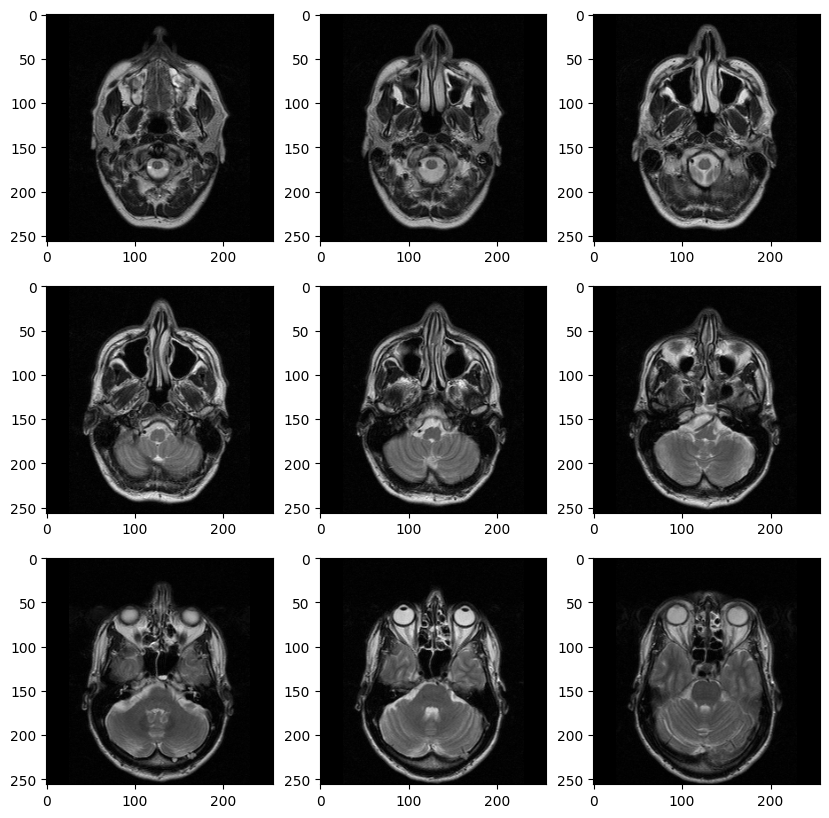

In [56]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(head_mri[slice_counter], cmap="gray")
        slice_counter+=1

# NIfTI image processing

Generally, nifti format is used to store the medical imaging and particularly useful for research purpose. Dicom data standard is generally used by hospitals to store the patients data.  Also, Nifti files are easy to handle as compared to DICOM files


In [1]:
!pip install dicom2nifti

ERROR: Could not find a version that satisfies the requirement dicom2nifti (from versions: none)
ERROR: No matching distribution found for dicom2nifti


Got error while downloading the dicom2nifti, so I used colab to download it and convert the dicom image into nifti image
I used following steps:

**import dicom2nifti**

**path_to_dicom = "SE000001"**

**dicom2nifti.convert_directory(path_to_dicom, ".")**

This will create 201_t2w_tse.nii.gz file, which is then added into input section in kaggle

In [4]:
import nibabel as nib #for preprocessing nifti file
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/pydicom/data/data_manager.py:375: UserWarning: A download failure occurred while attempting to retrieve color3d_jpeg_baseline.dcm
  warn_and_log(


In [5]:
nifti = nib.load('/kaggle/input/nifti-image/201_t2w_tse.nii')

In [6]:
print(nifti)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine:
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

In [7]:
nifti.shape

(256, 256, 27)

In [8]:
nifti.header.get_data_shape()

(256, 256, 27)

Obtaining the actual image from nifti datasets

In [10]:
image_array = nifti.get_fdata()
image_array.shape

(256, 256, 27)

Visualize the nifti image data

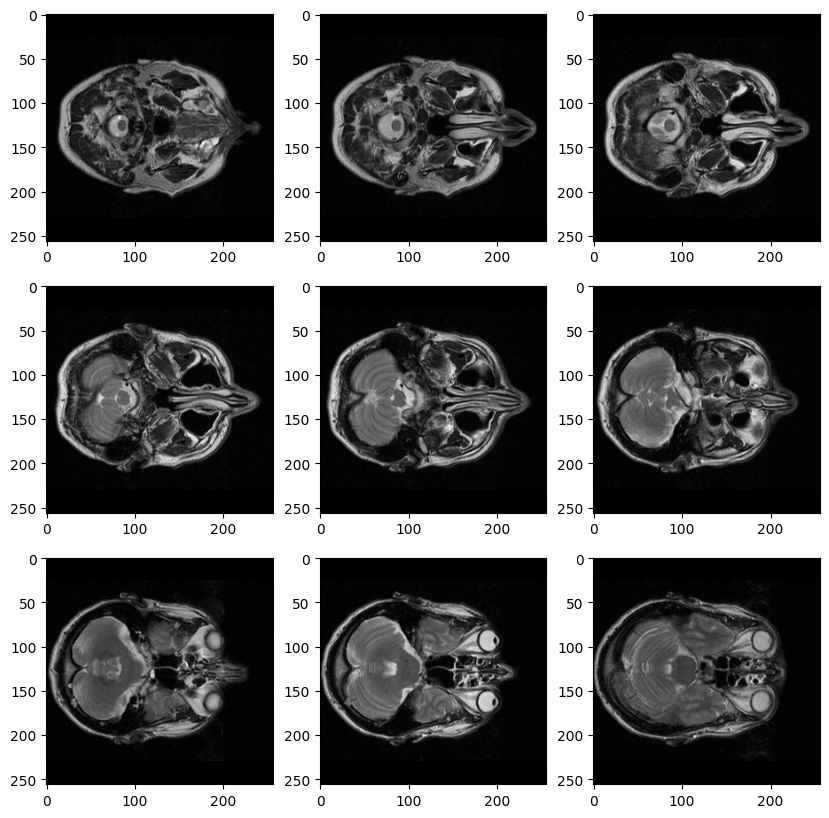

In [11]:
fig, ax = plt.subplots(3,3, figsize = (10,10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(image_array[:,:,slice_counter], cmap = 'gray')
        slice_counter+=1